# Module 4 Exercise

In these exercises, we will use ggplot2 (plotnine) and plotly functions (or methods) to plot some statistical plots about a data set. If you want to use Python, then please change the Notebook kernel from R to Python (Python 3) by clicking the `R` button at the right top corner of the Notebook tab.

**Have your ggplot2 (plotnine) and plotly cheatsheets and documentation handy to find the right parameters for the functions.** 

Let's read the Gapminder data from the web resource.

In [1]:
# If you use R, then please uncomment the following lines.
# library(tidyverse)
# library(plotly)
# library(RColorBrewer)
# data <- read.csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")
# head(data)

# If you use Python, then please uncomment the following lines and,
# change the Notebook kernel from R to Python
import pandas as pd
from plotnine import *
import plotnine as on
import plotly as pl
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")
data.head()

country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106

**Exercise 1:** Use which() function to get a subset of the data between years 1951 and 1993. 

In [2]:
# Your Code Here
# ------------------------
data_sample = data[(data['year'] >= 1951) & (data['year'] <= 1993)]
data.head()

country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106

**Exercise 2:** Plot **small multiples of histograms** of **life expectancy for each year** for the subset. Use a binwidth of **5**, and use sensible axis labels.

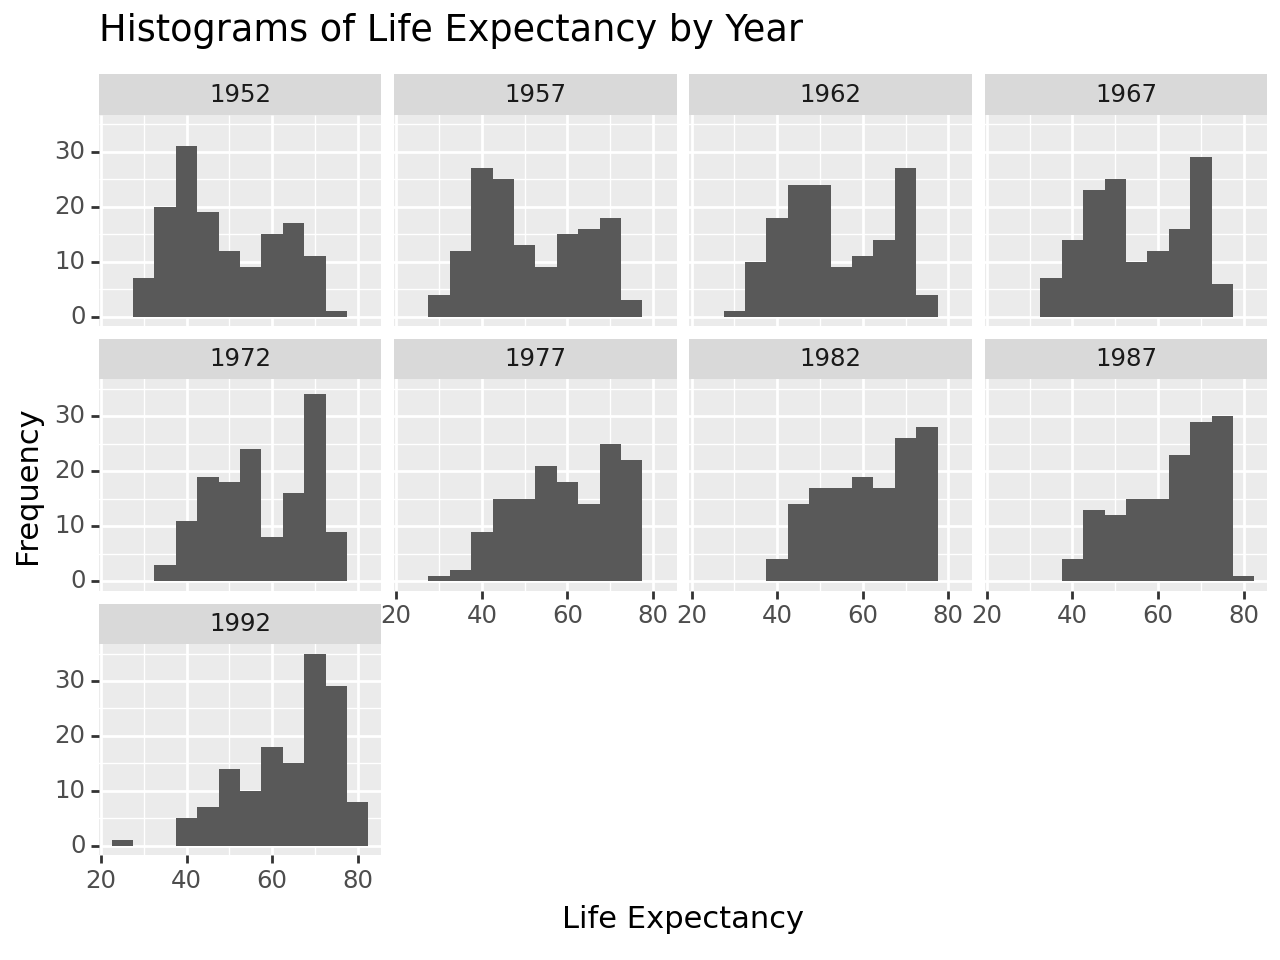

<Figure Size: (640 x 480)>

In [3]:
# Your Code Here
# ------------------------
ggplot(data_sample, aes(x='lifeExp')) +\
    geom_histogram(binwidth=5) +\
    facet_wrap('~ year', ncol=4) +\
    labs(x='Life Expectancy', y='Frequency', title='Histograms of Life Expectancy by Year')


**Exercise 3:** Do the same as above, but plot a density function this time. How do you interpret the change of density in years?

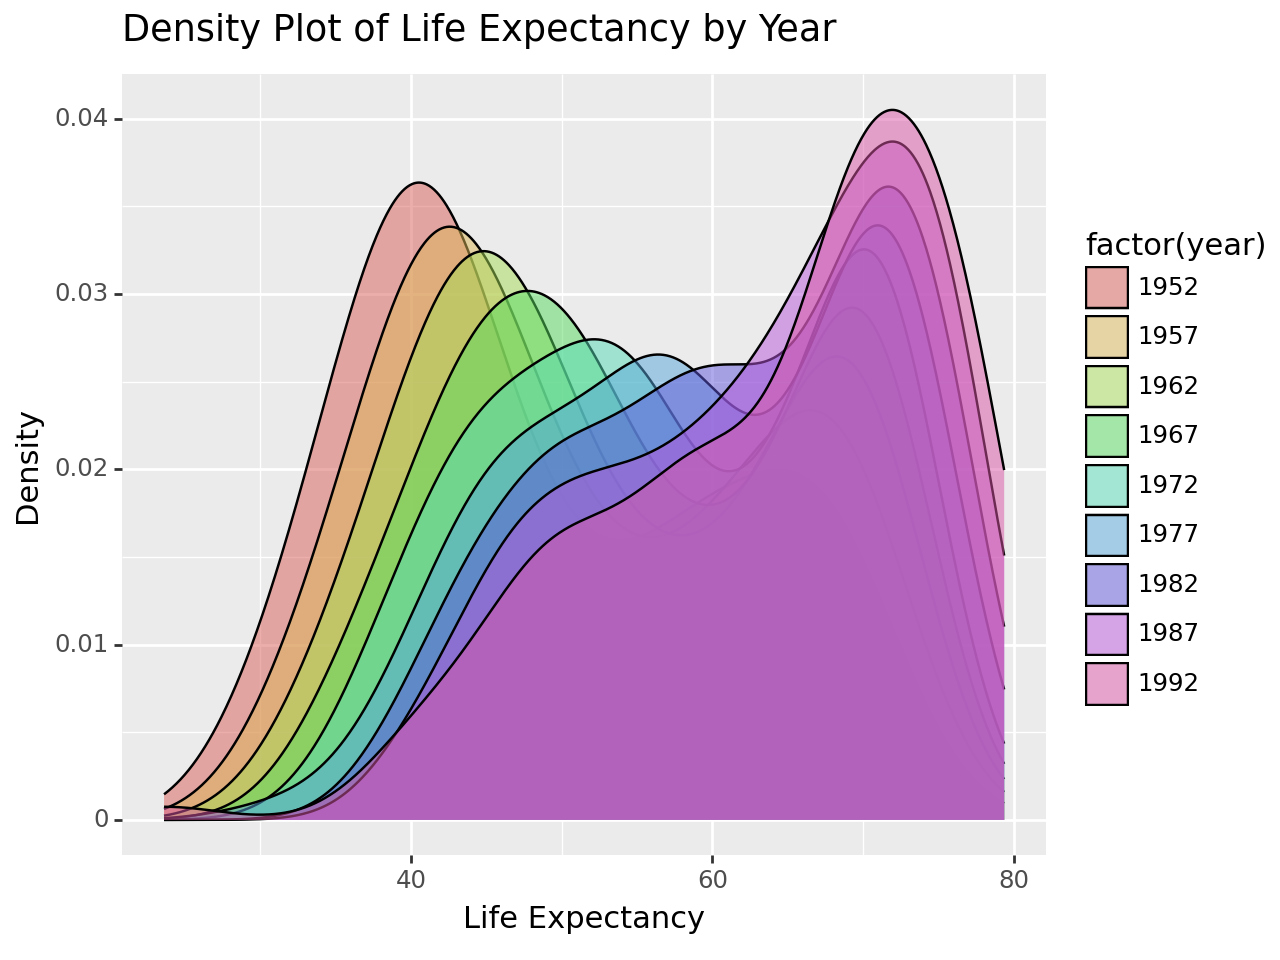

<Figure Size: (640 x 480)>

In [4]:
# Your Code Here
# ------------------------

ggplot(data_sample, aes(x='lifeExp', fill='factor(year)')) +\
    geom_density(alpha=0.5) +\
    labs(x='Life Expectancy', y='Density', title='Density Plot of Life Expectancy by Year')




**Interpretation**

# Your interpretation here
# ---
The Life expectancy is high in 1940 and gradually decrease upto 60's and suddendly rises to the peak in 1980's and marks the highest among all years

**Exercise 4:** Create a line plot (use both geom_line and geom_point) to plot year versus population for the **whole** data set. Use a logarithmic scale in **y axis** and **group by country**, **color by continent**. Can you see any pattern? 

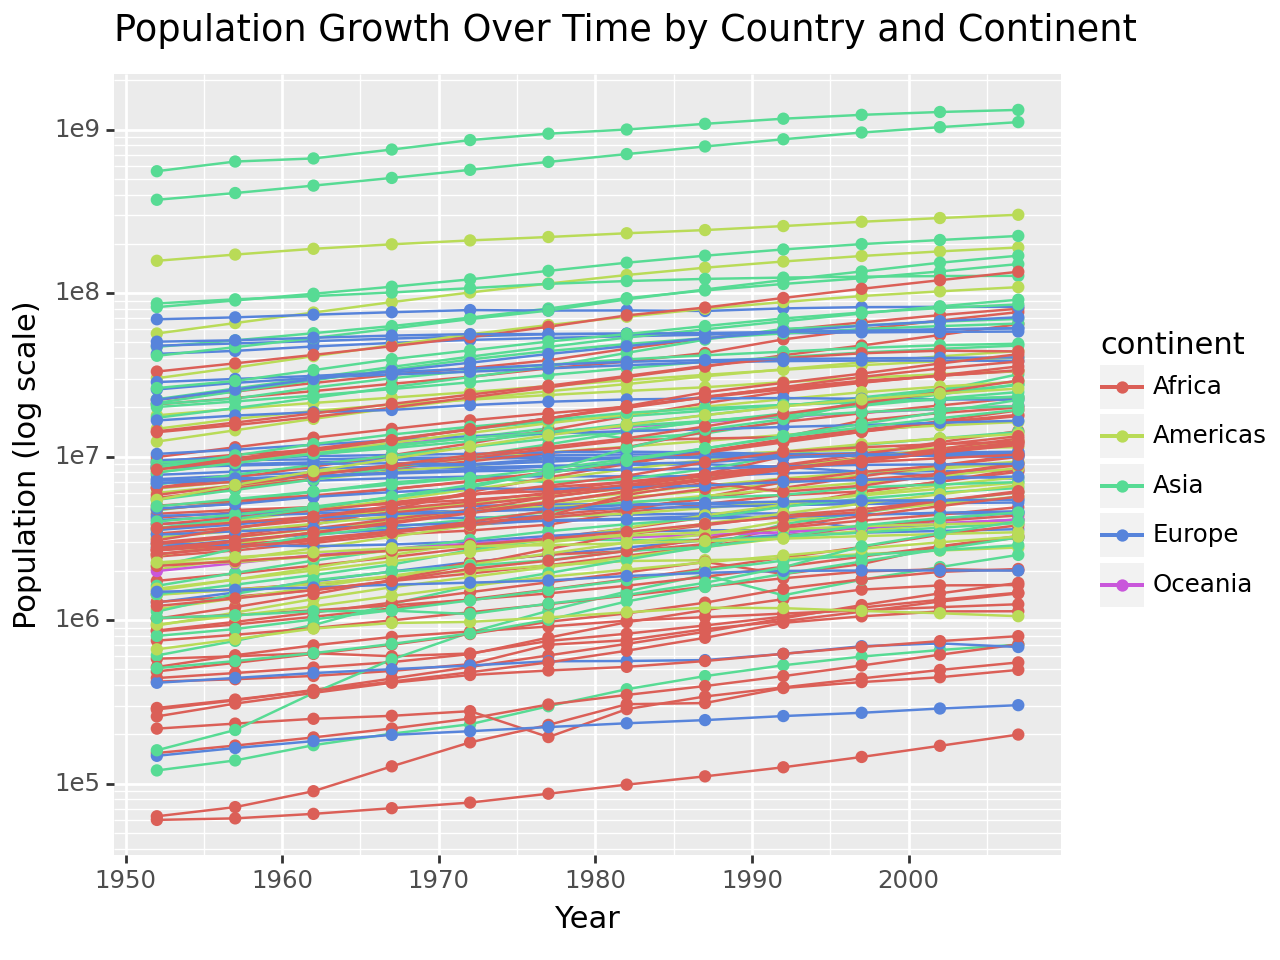

In [5]:
# Your Code Here
# ------------------------
plot = (ggplot(data, aes(x='year', y='pop', color='continent', group='country'))+
    geom_line() +
    geom_point() +
    scale_y_log10() +
    labs(x='Year', y='Population (log scale)', title='Population Growth Over Time by Country and Continent'))
print(plot)

Although it is hard to separate by each continent, there is an upward trend over year.

**Aggregate data:** The above plot is too crowded to see anything. Let's aggregate data by continent and year so that we can have meaningful data to plot. The following code creates a new data frame by computing the sums of population for years and continents.

In [6]:
# # If you use R please uncomment the following syntax 
# aggdata <- (
#     data %>% 
#     group_by(continent, year) %>%
#     summarise(x = sum(pop, na.rm=TRUE))
# )
# head(aggdata)

# # If you use Python, please uncomment the following syntax
aggdata = (
    data
    .groupby(["continent", "year"])["pop"]
    .sum().to_frame("x").reset_index()
)
aggdata.head()

continent  year            x
0    Africa  1952  237640501.0
1    Africa  1957  264837738.0
2    Africa  1962  296516865.0
3    Africa  1967  335289489.0
4    Africa  1972  379879541.0

**Exercise 5:** Now **repeat exercise 4 with this aggregate data** and group and color by continent. Do you see a pattern ?? 

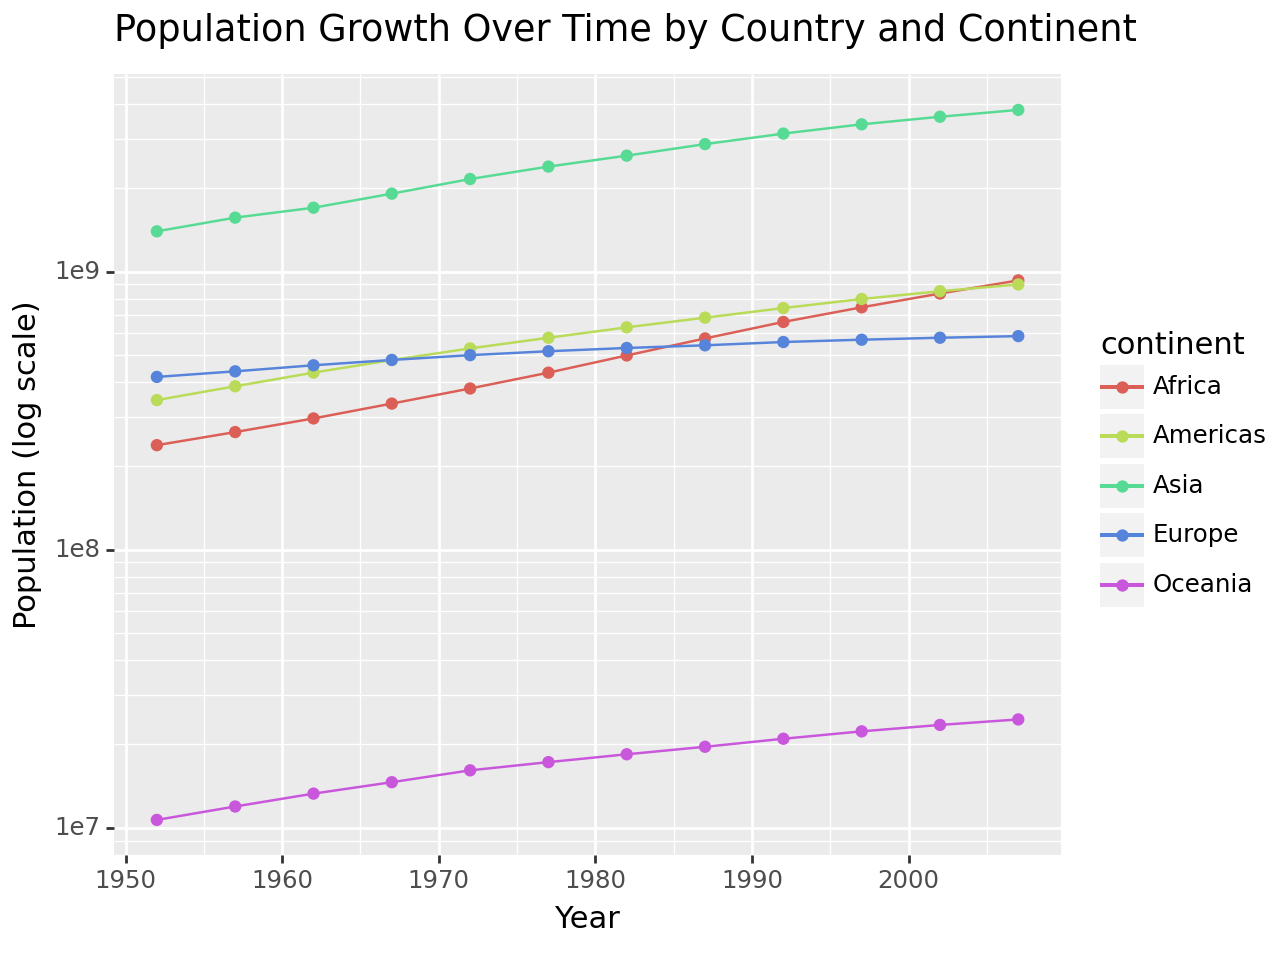

In [7]:
# Your Code Here
# ------------------------
plot = (ggplot(aggdata, aes(x='year', y='x', color='continent', group='continent')) +
    geom_line() +
    geom_point() +
    scale_y_log10() +
    labs(x='Year', y='Population (log scale)', title='Population Growth Over Time by Country and Continent'))

print(plot)

**Do you see a pattern?**

# Your Answer Here
Yes

**Exercise 6:** Now, plot a **stacked area chart** to see the same. Instead of group and color, use only **fill** parameter for **continent**, and use **geom_area**.

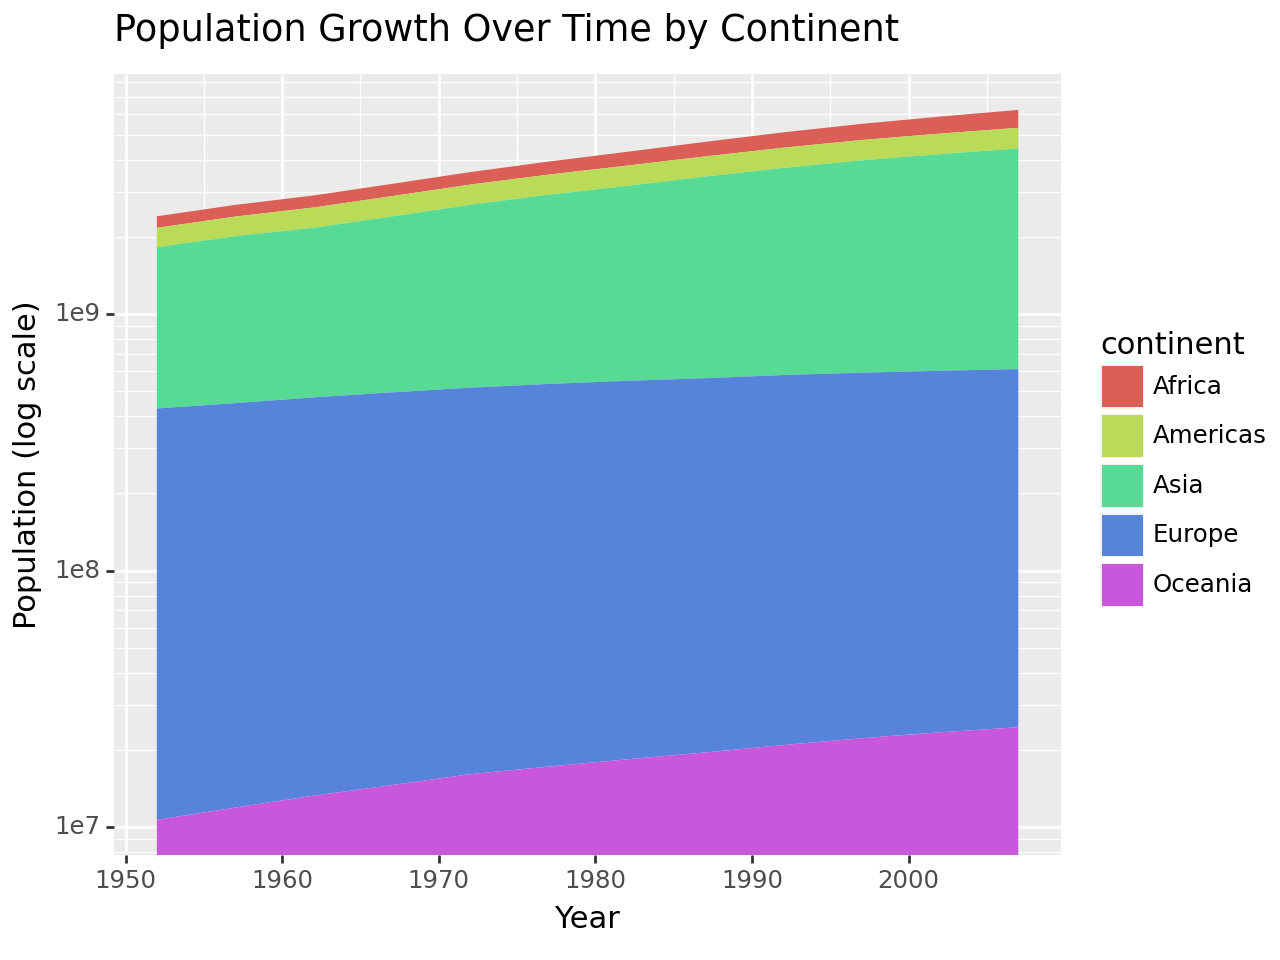

In [8]:
# Your Code Here
# ------------------------
plot = (ggplot(aggdata, aes(x='year', y='x', fill='continent', group='continent')) +
    geom_area() +
    scale_y_log10() +
    labs(x='Year', y='Population (log scale)', title='Population Growth Over Time by Continent')
    )
print(plot)

**Find percentages:** The above plot shows actual population numbers and they grow in time. We want to see the percentage change of the continents' populations with respect to total world population. The code below computes that. 

In [9]:
# # If you use R, then please uncomment the following lines
# my_fun=function(vec){ as.numeric(vec[3]) / sum(aggdata$x[aggdata$year==vec[2]]) *100 }
# aggdata$perc=apply(aggdata , 1 , my_fun)
# head(aggdata)

# # If you use Python, then please uncomment the follwoing lines
aggdata["perc"] = aggdata["x"] / aggdata.groupby(["year"])["x"].transform("sum") * 100
aggdata.head()

continent  year            x       perc
0    Africa  1952  237640501.0   9.873067
1    Africa  1957  264837738.0   9.939847
2    Africa  1962  296516865.0  10.225485
3    Africa  1967  335289489.0  10.420878
4    Africa  1972  379879541.0  10.620128

**Exercise 7:** Now, **plot the same as exercise 6** but use **perc** as the y axis. 

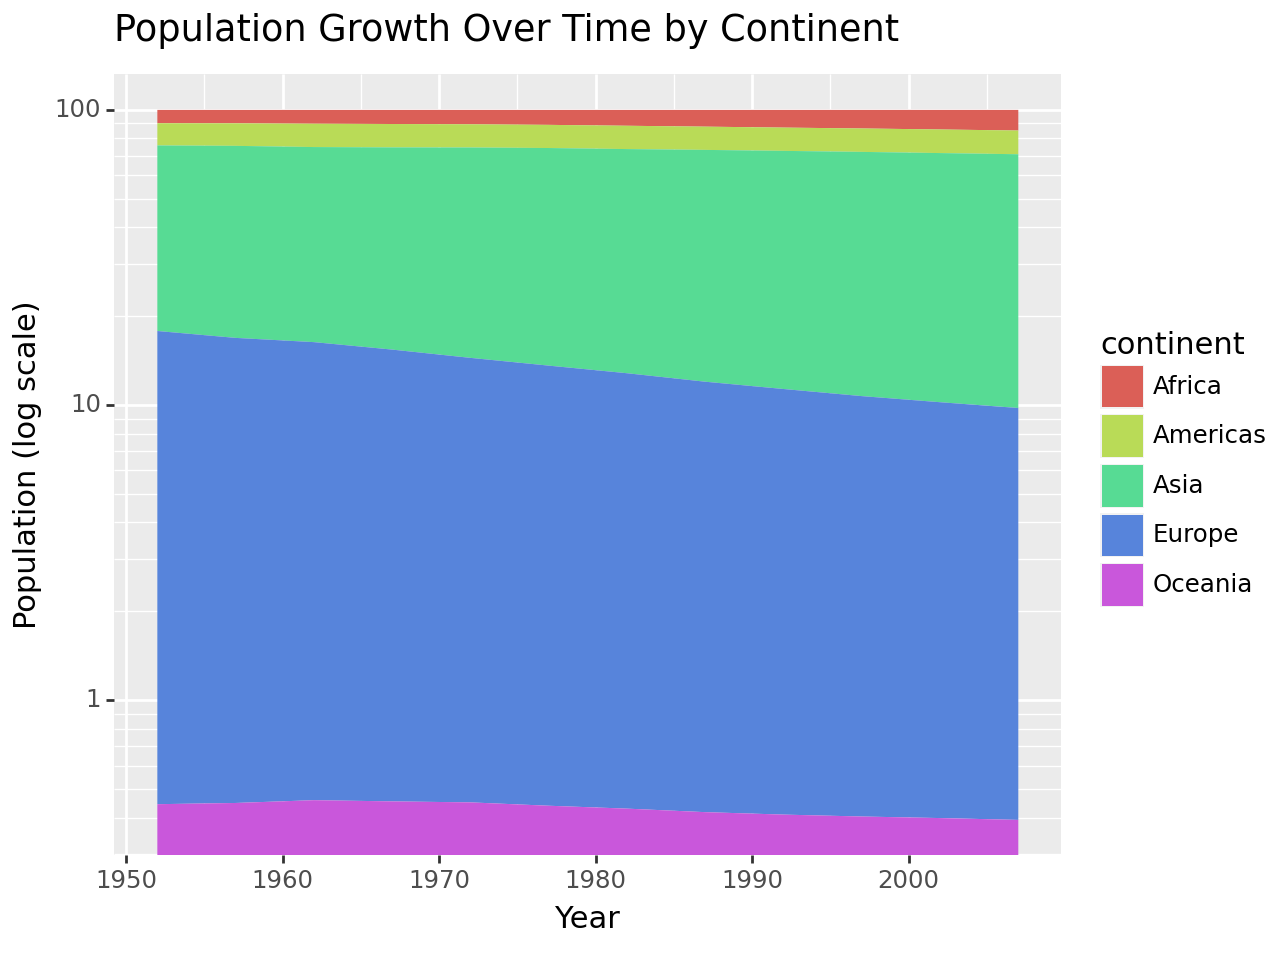

In [10]:
# Your Code Here
# ------------------------
plot = (ggplot(aggdata, aes(x='year', y='perc', fill='continent',group = 'continent')) +\
    geom_area() +\
    scale_y_log10() +\
    labs(x='Year', y='Population (log scale)', title='Population Growth Over Time by Continent'))

print(plot)

**Exercise 8:** We will aggregate once more; this time we will compute the **mean gdp per capita for continents and years**. **It's your turn this time.**

In [11]:
# Your Code Here
# ------------------------
mean_gdp_per_capita = data.groupby(['continent', 'year'])['gdpPercap'].mean().reset_index()
mean_gdp_per_capita.head()

continent  year    gdpPercap
0    Africa  1952  1252.572466
1    Africa  1957  1385.236062
2    Africa  1962  1598.078825
3    Africa  1967  2050.363801
4    Africa  1972  2339.615674

**Exercise 9:** Plot a **heatmap** using **plot_ly function** for **years** vs. **continents** using the **mean gdp per capita as the z value**. 

In [12]:
pivot_mean_gdp = mean_gdp_per_capita.pivot(index='year', columns='continent', values='gdpPercap')
pivot_mean_gdp.head()

continent       Africa     Americas         Asia        Europe       Oceania
year                                                                        
1952       1252.572466  4079.062552  5195.484004   5661.057435  10298.085650
1957       1385.236062  4616.043733  5787.732940   6963.012816  11598.522455
1962       1598.078825  4901.541870  5729.369625   8365.486814  12696.452430
1967       2050.363801  5668.253496  5971.173374  10143.823757  14495.021790
1972       2339.615674  6491.334139  8187.468699  12479.575246  16417.333380

In [13]:
# Your Code Here
# ------------------------
import plotly.graph_objects as go
heatmap = go.Heatmap(z=pivot_mean_gdp.values,
                     x=pivot_mean_gdp.columns,
                     y=pivot_mean_gdp.index,
                     colorscale='Viridis',
                     colorbar=dict(title='Mean GDP Per Capita'))
layout = go.Layout(title='Mean GDP Per Capita by Year and Continent',
                   xaxis=dict(title='Continent'),
                   yaxis=dict(title='Year'))
fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

**Exercise 10:** Plot a **boxplot** for **gdp per capita** using **plot_ly function** for **continents**. 

Use the **whole** data set, **color by continent**, and make sure **y axis is in log scale**. 

In [14]:
import plotly.express as px

# Create the boxplot
fig = px.box(data, x='continent', y='gdpPercap', color='continent',
             title='GDP Per Capita by Continent (Boxplot)',
             labels={'gdpPercap': 'GDP Per Capita (log scale)', 'continent': 'Continent'},
             log_y=True)

# Show the plot
fig.show()


**When hovering over data, what do you notice about first and third quartiles for each continent (hint: think of income inequality) ?** 

# Your Answer Here
# ------

Europe has the more income inequality because the difference between q1 and q3 or the gap between the box represents the strength of income inequality and Africa has the low income inequality.

# Please Save the file, then submit to Blackboard (File -> Save Notebook)